# **Predicting Delaney Solubility using Linear regression and Random forest**

# Load Data

In [54]:
import pandas as pd

df = pd.read_csv('./dataset/delaney_solubility_with_descriptors.csv')

df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


# Data Preparation

##Seperating data as X and Y

In [9]:
Y = df['logS']
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [10]:
X = df.drop('logS', axis = 1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Data Splitting

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)

## Train set

In [12]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


## Test set

In [13]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


# **Model Building**

## **Linear Regression**

### Training the model

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

### Applying the model to make a prediction

In [17]:
Y_LR_train_pred = lr.predict(X_train)
Y_LR_test_pred = lr.predict(X_test)

print('Prediction Complete')

Prediction Complete


### Evaluate model performance

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(Y_train, Y_LR_train_pred)
lr_train_r2 = r2_score(Y_train, Y_LR_train_pred)

lr_test_mse = mean_squared_error(Y_test, Y_LR_test_pred)
lr_test_r2 = r2_score(Y_test, Y_LR_test_pred)

In [21]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  1.0075362951093687
LR R2 (Train):  0.7645051774663391
LR MSE (Test):  1.0206953660861033
LR R2 (Test):  0.7891616188563282


In [24]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


## Random Forest

### Training the model

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, Y_train)
print('Model Trained')

Model Trained


### Applying the model to make a prediction

In [26]:
Y_RF_train_pred = rf.predict(X_train)
Y_RF_test_pred = rf.predict(X_test)

print('Prediction Complete')

Prediction Complete


### Evaluate model performance

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(Y_train, Y_RF_train_pred)
rf_train_r2 = r2_score(Y_train, Y_RF_train_pred)

rf_test_mse = mean_squared_error(Y_test, Y_RF_test_pred)
rf_test_r2 = r2_score(Y_test, Y_RF_test_pred)

In [28]:
print('RF MSE (Train): ', rf_train_mse)
print('RF R2 (Train): ', rf_train_r2)
print('RF MSE (Test): ', rf_test_mse)
print('RF R2 (Test): ', rf_test_r2)

RF MSE (Train):  1.028227802112806
RF R2 (Train):  0.7596688824431413
RF MSE (Test):  1.407688264904896
RF R2 (Test):  0.7092230211002489


In [29]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.028228,0.759669,1.407688,0.709223


## **Model Comparison**

In [32]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random forest,1.028228,0.759669,1.407688,0.709223


## **Data visualization of (LR) prediction result**

Text(0.5, 0, 'Experimental LogS')

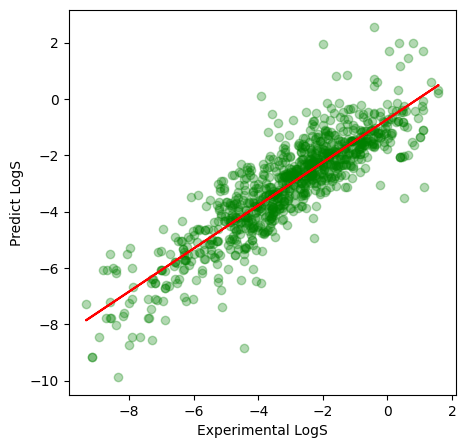

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))
plt.scatter(x=Y_train, y=Y_LR_train_pred, c='green', alpha=0.3)

z = np.polyfit(Y_train, Y_LR_train_pred, 1)
p = np.poly1d(z)

plt.plot(Y_train, p(Y_train), color='red')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

## **Data visualization of (RF) prediction result**

Text(0.5, 0, 'Experimental LogS')

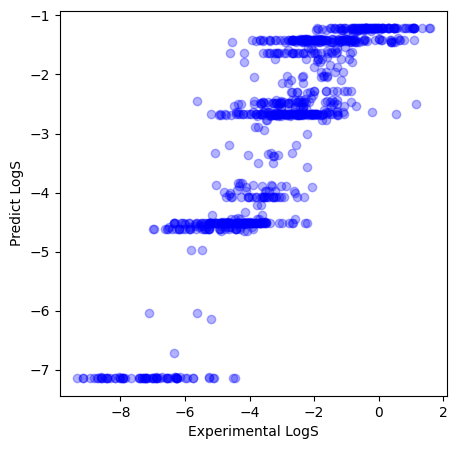

In [52]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))
plt.scatter(x=Y_train, y=Y_RF_train_pred, c='blue', alpha=0.3)

plt.plot()
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')